In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\Projects\\JobSearch\\aug_train.csv")
# dataset location https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [7]:
df_test = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\Projects\\JobSearch\\aug_test.csv")

In [8]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
df.experience.replace(['>','<'],'',regex=True, inplace=True)
df_test.experience.replace(['>','<'],'',regex=True, inplace=True)

In [11]:
df.drop(labels=['enrollee_id','city','gender','company_size','company_type'],axis=1,inplace=True)
df_test.drop(labels=['enrollee_id','city','gender','company_size','company_type'],axis=1,inplace=True)

In [12]:
df.last_new_job.replace({'<':'', '>':'', 'never':'0'},regex=True,inplace=True)
df_test.last_new_job.replace({'<':'', '>':'', 'never':'0'},regex=True,inplace=True)

In [13]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15792 entries, 0 to 19155
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  15792 non-null  float64
 1   relevent_experience     15792 non-null  object 
 2   enrolled_university     15792 non-null  object 
 3   education_level         15792 non-null  object 
 4   major_discipline        15792 non-null  object 
 5   experience              15792 non-null  object 
 6   last_new_job            15792 non-null  object 
 7   training_hours          15792 non-null  int64  
 8   target                  15792 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


In [15]:
print(df.enrolled_university.unique())
print(df.education_level.unique())
print(df.major_discipline.unique())
print(df.relevent_experience.unique())

['no_enrollment' 'Full time course' 'Part time course']
['Graduate' 'Masters' 'Phd']
['STEM' 'Arts' 'Humanities' 'Business Degree' 'No Major' 'Other']
['Has relevent experience' 'No relevent experience']


In [16]:
df.replace({'enrolled_university':{'no_enrollment':0, 'Part time course':1, 'Full time course':2}, 'education_level':{'Graduate':0, 'Masters':1, 'Phd':3}, 'major_discipline':{'No Major':0, 'Other':1, 'Arts':2, 'Humanities':3, 'Business Degree':4, 'STEM':5}}, regex=True, inplace=True)
df_test.replace({'enrolled_university':{'no_enrollment':0, 'Part time course':1, 'Full time course':2}, 'education_level':{'Graduate':0, 'Masters':1, 'Phd':3}, 'major_discipline':{'No Major':0, 'Other':1, 'Arts':2, 'Humanities':3, 'Business Degree':4, 'STEM':5}}, regex=True, inplace=True)

In [17]:
df.relevent_experience.replace({'Has relevent experience':1, 'No relevent experience':0},regex=True,inplace=True)
df_test.relevent_experience.replace({'Has relevent experience':1, 'No relevent experience':0},regex=True,inplace=True)

In [18]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.920,1,0,0,5,20,1,36,1.0
1,0.776,0,0,0,5,15,4,47,0.0
2,0.624,0,2,0,5,5,0,83,0.0
4,0.767,1,0,1,5,20,4,8,0.0
5,0.764,1,1,0,5,11,1,24,1.0


In [19]:
df.target = df.target.astype(int)
df_test.target = df.target.astype(int)

In [27]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.920,1,0,0,5,20,1,36,1
1,0.776,0,0,0,5,15,4,47,0
2,0.624,0,2,0,5,5,0,83,0
4,0.767,1,0,1,5,20,4,8,0
5,0.764,1,1,0,5,11,1,24,1


In [26]:
df_test.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours
0,0.827,1,2,0,5,9,1,21
1,0.920,1,0,0,5,5,1,98
3,0.827,1,0,1,5,11,1,39
4,0.920,1,0,0,5,20,4,72
5,0.899,0,1,1,5,10,2,12


In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_Test = df_test.iloc[:, :-1].values
y_Test = df_test.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier(n_estimators=100, random_state=0)
rand_class.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred = rand_class.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2065  279]
 [ 539  276]]


0.7410572966128521

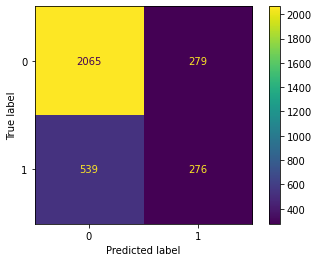

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand_class,X_test,y_test)